In [4]:
!pip install -q biopython
!pip install Bio
!pip install -q ReportLab
#gseapy
!pip install -q gseapy

In [13]:
import gseapy as gp
from gseapy import barplot, dotplot

XGBoost returns a list with the most important features to predict the condition of the cell. A common double-check done in biology is to check it this set of genes is involved in some biological path, or if these genes are just together "by chance".
To check this, you usually test your group against a dataset of set of genes well known for their function in some biological path. Checking how much our genes are over(or under) represented with respect to a set of genes in a specific biological path, we can compute an adjusted p value, that will give us an idea of how sure we are that our set is linked to that pathway. 

We then define to lists of genes:
* Our genes list, that is basically our set of significant genes for predicting the condition of Hypoxia or Normoxia. As we said before, this is the list of relevant genes returned by XGBoost.
* A list of sets of genes, well known for being involved in biological paths. We choose as dataset for these sets the MSigDB_Hallmark_2020, since it's well recognized in literature, and it was shown in class.

The adjusted p-values will be computed over over these two lists, using a default dest given by the function gp.enrich, that is .....

In [18]:
gene_list = ['PSMD2', 'HSPA8', 'TUBB', 'ACTG1', 'TUBA1B', 'LDHB', 'AKR1C2', 'SQSTM1', 'KRT18', 'PLAU', 'TFRC', 'H4C3', 'MMP1', 'MT-CYB', 'PRDX1', 'LAMC2', 'MALAT1', 'HMGA1', 'AKR1C3', 'SERPINB5', 'PRNP', 'DKK1', 'CD44', 'GPX3', 'S100A2', 'MT-CO3', 'RRM2', 'KPNA2', 'SRXN1', 'TUBB4B', 'KCNH3', 'DUOXA1', 'EPHA4', 'FLRT3', 'OR8G3P', 'ZIC5', 'JADE3', 'FLI1', 'IRF5', 'GUCY1B1', 'ANKRD1', 'ZNF77', 'ZNF311', 'CGN', 'FHIP2B', 'FBN1', 'ZDHHC23', 'S1PR1', 'BBS12', 'PCDH9', 'SEMA4A', 'NRIP3', 'NPNT', 'C3', 'DNER', 'TCN2', 'PDCD1LG2', 'TDRD7', 'ZNF878', 'HKDC1', 'DDIT4', 'NDRG1', 'FAM162A', 'C4orf3', 'BNIP3L', 'ANGPTL4', 'P4HA1', 'CA9', 'PGK1', 'PLOD2', 'FUT11', 'EGLN1', 'ALDOA', 'SLC2A1', 'LDHA', 'PFKFB3', 'SLC6A8', 'LOXL2', 'MOB3A', 'MIF-AS1', 'BNIP3', 'GPI', 'PLIN2', 'ERO1A', 'KCTD11', 'EIF5', 'TPBG', 'STC2', 'KYNU', 'INSIG1', 'TXN', 'ITGA6', 'NQO1', 'KRT6A', 'CAV1', 'CDC20', 'F3', 'CCNB1']
gene_sets = ['MSigDB_Hallmark_2020'] # selected as it was shown in class
gene_background = None

In [19]:
enr = gp.enrichr(gene_list=gene_list, 
                 gene_sets=gene_sets, 
                 organism='human', 
                 background=gene_background,
                 outdir=None, 
                )

In [23]:
print(enr.results)

                Gene_set                               Term Overlap  \
0   MSigDB_Hallmark_2020                            Hypoxia  18/200   
1   MSigDB_Hallmark_2020                   mTORC1 Signaling  14/200   
2   MSigDB_Hallmark_2020                         Glycolysis  13/200   
3   MSigDB_Hallmark_2020    Reactive Oxygen Species Pathway    6/49   
4   MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition   8/200   
5   MSigDB_Hallmark_2020               IL-2/STAT5 Signaling   7/199   
6   MSigDB_Hallmark_2020                     UV Response Up   6/158   
7   MSigDB_Hallmark_2020                          Apoptosis   6/161   
8   MSigDB_Hallmark_2020      TNF-alpha Signaling via NF-kB   6/200   
9   MSigDB_Hallmark_2020                       Adipogenesis   6/200   
10  MSigDB_Hallmark_2020                        E2F Targets   6/200   
11  MSigDB_Hallmark_2020                        p53 Pathway   6/200   
12  MSigDB_Hallmark_2020                    heme Metabolism   6/200   
13  MS

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


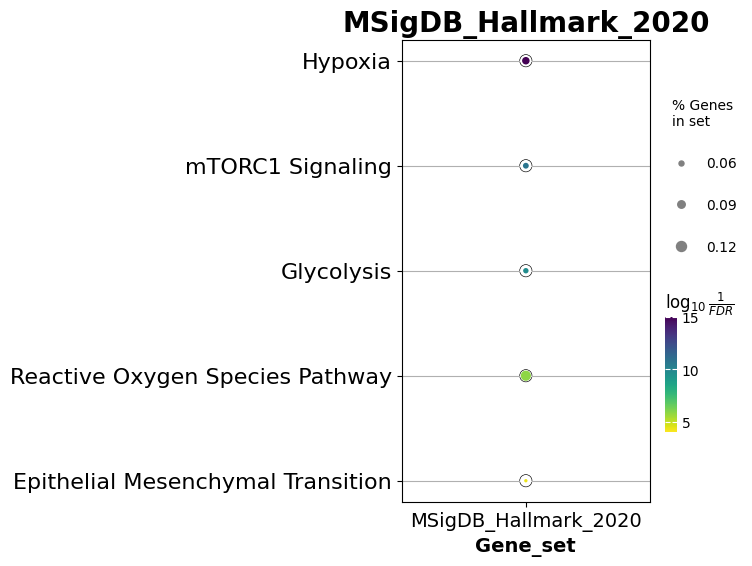

In [22]:
#Show top 5 terms of each gene_set ranked by “Adjusted P-value”
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(4,6),
              title = "MSigDB_Hallmark_2020", 
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

 We immediately see that the gene sets that are over-represented are the ones corresponding to: Hypoxia. This is of course to be expected, since we have used as our gene list the genes that are relevant for classification of hypoxia.

In [31]:
enrichment_results_df = enr.results
enrichment_results_df.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Hypoxia,18/200,4.704884e-18,1.740807e-16,0,0,24.379121,972.676474,ERO1A;BNIP3L;GPI;PFKFB3;CAV1;TPBG;SLC2A1;NDRG1...
1,MSigDB_Hallmark_2020,mTORC1 Signaling,14/200,9.881888e-13,1.828149e-11,0,0,17.666667,488.357946,ERO1A;GPI;RRM2;TFRC;INSIG1;SLC2A1;PLOD2;LDHA;P...
2,MSigDB_Hallmark_2020,Glycolysis,13/200,1.724716e-11,2.127150e-10,0,0,16.124253,399.613384,ERO1A;TPBG;PLOD2;TXN;LDHA;P4HA1;FAM162A;STC2;D...
3,MSigDB_Hallmark_2020,Reactive Oxygen Species Pathway,6/49,1.398250e-07,1.293382e-06,0,0,30.119818,475.377290,NQO1;PRNP;SRXN1;GPX3;PRDX1;TXN
4,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,8/200,6.336140e-06,4.688743e-05,0,0,9.125000,109.219323,SLC6A8;MMP1;PLOD2;LAMC2;DKK1;CD44;LOXL2;FBN1
